In [1]:
import pandas as pd

In [2]:
y_pred_df = pd.read_csv("acol_Y_trace.txt", sep="\t")

In [3]:
y_pred = y_pred_df.mean().to_numpy()

In [4]:
true_y_df = pd.read_csv("../acol_simulated_Y.txt", sep="\t")

In [5]:
true_y_df

,position,Y_state,molecules,species,fraction_of_one
0,0,1,cholesterol,human,0.99940
1,1,1,cholesterol,mosquito,0.39938
2,2,0,cholesterol,fly,0.42732
3,3,0,cholesterol,worm,0.41234
4,4,1,cholesterol,bacteria,0.46516
...,...,...,...,...,...
427,427,0,lima,cat,0.15784
428,428,0,lima,fish,0.16758
429,429,0,lima,bird,0.17706
430,430,0,lima,plant,0.17870


In [6]:
true_y = true_y_df["Y_state"].to_numpy()

In [7]:
assert y_pred.shape == true_y.shape

In [8]:
out = pd.DataFrame([true_y, y_pred]).T

In [9]:
out.corr()

,0,1
0,1.000000,0.999987
1,0.999987,1.000000


[Text(0.5, 0, 'True Y'),
 Text(0, 0.5, 'Y predicted'),
 Text(0.5, 1.0, 'Prediction vs true Y')]

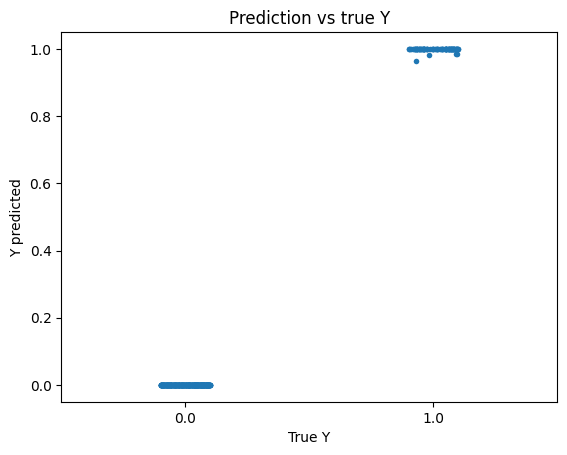

In [10]:
import seaborn as sns

sns.stripplot(data=out, x=out[0], y=out[1], size=4).set(
    xlabel="True Y", ylabel="Y predicted", title="Prediction vs true Y"
)

# Now for the Z of species

In [11]:
z_species_pred = pd.read_csv("./acol_species_Z_trace.txt", sep="\t").mean().to_numpy()
true_z_species = pd.read_csv("../acol_simulated_Z_species.txt", sep="\t")[
    "Z_state"
].to_numpy()

[Text(0.5, 0, 'True Z'),
 Text(0, 0.5, 'Z predicted'),
 (-0.1, 1.1),
 Text(0.5, 1.0, 'Species Z')]

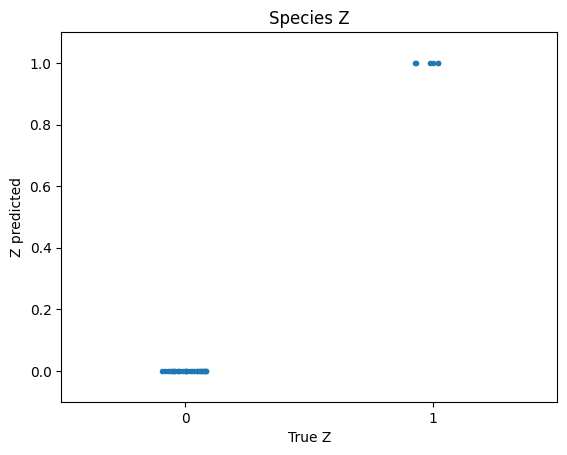

In [12]:
sns.stripplot(x=true_z_species, y=z_species_pred, size=4).set(
    xlabel="True Z", ylabel="Z predicted", ylim=(-0.1, 1.1), title="Species Z"
)

# Now for the Z of molecules

[Text(0.5, 0, 'True Z'),
 Text(0, 0.5, 'Z predicted'),
 (-0.1, 1.1),
 Text(0.5, 1.0, 'Molecules Z')]

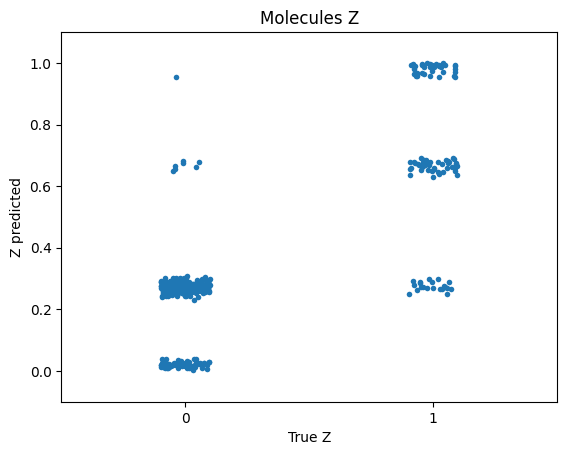

In [13]:
z_molecules_pred = (
    pd.read_csv("./acol_molecules_Z_trace.txt", sep="\t").mean().to_numpy()
)
true_z_molecules = pd.read_csv("../acol_simulated_Z_molecules.txt", sep="\t")[
    "Z_state"
].to_numpy()


sns.stripplot(x=true_z_molecules, y=z_molecules_pred, size=4).set(
    xlabel="True Z", ylabel="Z predicted", ylim=(-0.1, 1.1), title="Molecules Z"
)